In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\archive (2)\\Training.csv")
df_val=pd.read_csv("C:\\Users\\lenovo\\Downloads\\archive (2)\\Testing.csv")
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [4]:
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [5]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [6]:
df.drop(columns=['Unnamed: 133'],inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.iloc[:,:-1].values
x_val=df_val.iloc[:,:-1].values
X

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 1]], dtype=int64)

In [9]:
Y=df.iloc[:,-1].values
y_val=df_val.iloc[:,-1].values
Y

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,train_size=0.8)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
oe=OrdinalEncoder()

In [13]:
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
y_val_reshaped=y_val.reshape(-1,1)
y_train_encoded=oe.fit_transform(y_train_reshaped)
y_test_encoded=oe.transform(y_test_reshaped)
y_val_encoded=oe.transform(y_val_reshaped)

In [14]:
categories = oe.categories_[0]

for i, category in enumerate(categories):
    print(f"{category}: {i}")

(vertigo) Paroymsal  Positional Vertigo: 0
AIDS: 1
Acne: 2
Alcoholic hepatitis: 3
Allergy: 4
Arthritis: 5
Bronchial Asthma: 6
Cervical spondylosis: 7
Chicken pox: 8
Chronic cholestasis: 9
Common Cold: 10
Dengue: 11
Diabetes : 12
Dimorphic hemmorhoids(piles): 13
Drug Reaction: 14
Fungal infection: 15
GERD: 16
Gastroenteritis: 17
Heart attack: 18
Hepatitis B: 19
Hepatitis C: 20
Hepatitis D: 21
Hepatitis E: 22
Hypertension : 23
Hyperthyroidism: 24
Hypoglycemia: 25
Hypothyroidism: 26
Impetigo: 27
Jaundice: 28
Malaria: 29
Migraine: 30
Osteoarthristis: 31
Paralysis (brain hemorrhage): 32
Peptic ulcer diseae: 33
Pneumonia: 34
Psoriasis: 35
Tuberculosis: 36
Typhoid: 37
Urinary tract infection: 38
Varicose veins: 39
hepatitis A: 40


In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
x_train.shape

(3936, 132)

#### creating ann model

In [17]:
model=Sequential()
model.add(Dense(3,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(20,activation='relu'))
model.add(Dense(41,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 399       
                                                                 
 dense_1 (Dense)             (None, 20)                80        
                                                                 
 dense_2 (Dense)             (None, 41)                861       
                                                                 
Total params: 1340 (5.23 KB)
Trainable params: 1340 (5.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for multiclass classification
              metrics=['accuracy'])


In [20]:
history = model.fit(x_train, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10


123/123 [==============================] - 2s 3ms/step - loss: 3.6319 - accuracy: 0.0556
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 3.1948 - accuracy: 0.1441
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 2.5796 - accuracy: 0.2901
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 2.0451 - accuracy: 0.4403
Epoch 5/10
123/123 [==============================] - 0s 3ms/step - loss: 1.6390 - accuracy: 0.5485
Epoch 6/10
123/123 [==============================] - 0s 3ms/step - loss: 1.3506 - accuracy: 0.6418
Epoch 7/10
123/123 [==============================] - 0s 3ms/step - loss: 1.1365 - accuracy: 0.7025
Epoch 8/10
123/123 [==============================] - 0s 3ms/step - loss: 0.9649 - accuracy: 0.7853
Epoch 9/10
123/123 [==============================] - 0s 3ms/step - loss: 0.8182 - accuracy: 0.8427
Epoch 10/10
123/123 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.89

In [21]:
##testing accuracy 
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

31/31 [==============================] - 1s 3ms/step - loss: 0.6496 - accuracy: 0.9045
Test Loss: 0.6495535373687744, Test Accuracy: 0.9044715166091919


In [22]:
## val score
loss_val, accuracy_val = model.evaluate(x_val, y_val_encoded)
print(f'val Loss: {loss_val}, val Accuracy: {accuracy_val}')

2/2 [==============================] - 0s 5ms/step - loss: 0.6607 - accuracy: 0.9048
val Loss: 0.6607123017311096, val Accuracy: 0.9047619104385376


In [23]:
# prediction on new data
temp=x_train[0].reshape(1,-1)
y_train[0]

'Chicken pox'

In [24]:
pred=model.predict(temp)
predicted_labels = np.argmax(pred, axis=1)
oe.inverse_transform(predicted_labels.reshape(-1,1))     # coz it accpet 2D input # alternative was [predicted_labels]

1/1 [==============================] - 0s 222ms/step


array([['Chicken pox']], dtype=object)

In [25]:
history.history

{'loss': [3.6318626403808594,
  3.1947877407073975,
  2.5795888900756836,
  2.0450661182403564,
  1.6389696598052979,
  1.3505812883377075,
  1.13649320602417,
  0.9649336934089661,
  0.8181782960891724,
  0.6842281222343445],
 'accuracy': [0.055640242993831635,
  0.14405487477779388,
  0.2901422679424286,
  0.44029471278190613,
  0.548526406288147,
  0.6417682766914368,
  0.7024898529052734,
  0.7853150367736816,
  0.8427337408065796,
  0.8912601470947266]}

In [26]:
import matplotlib.pyplot as plt

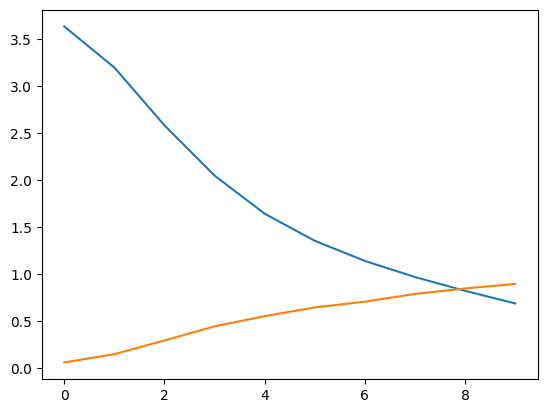

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

### Some methhods in model object/class

In [39]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 399       
                                                                 
 dense_1 (Dense)             (None, 20)                80        
                                                                 
 dense_2 (Dense)             (None, 41)                861       
                                                                 
Total params: 1340 (5.23 KB)
Trainable params: 1340 (5.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.save("my_model.h5")
loaded_model = keras.models.load_model("my_model.h5")


In [40]:
weights = model.get_weights()
weights
#model.set_weights(weights)

[array([[ 7.27141261e-01,  6.23452663e-01,  3.66064101e-01],
        [ 5.58643103e-01,  4.11562741e-01,  5.05310416e-01],
        [ 8.38939011e-01, -7.92293191e-01,  7.54479468e-01],
        [-3.92941684e-01, -1.06164843e-01, -2.57720381e-01],
        [ 2.16063336e-02, -1.26185998e-01, -1.48118496e-01],
        [-5.18217266e-01,  5.14545083e-01, -2.16071531e-01],
        [ 8.24959338e-01,  9.18320715e-01,  3.01191472e-02],
        [-2.86401194e-02,  9.60976124e-01, -3.89724016e-01],
        [ 8.94819915e-01, -7.21357763e-02, -2.39534408e-01],
        [ 4.42216963e-01,  2.05890030e-01, -3.55807930e-01],
        [ 4.75059420e-01,  5.59698462e-01, -3.78724724e-01],
        [ 7.40173161e-01,  7.52880096e-01,  3.78214478e-01],
        [-4.57892746e-01,  3.63301963e-01, -3.04978341e-01],
        [-3.30353796e-01,  1.06841934e+00, -1.11629702e-01],
        [ 3.23884159e-01, -6.61932081e-02,  1.70640647e-01],
        [-7.13284016e-02, -3.27474400e-02,  6.80158794e-01],
        [ 1.00728698e-01

callbacks: Callbacks are functions that can be applied at certain stages of the training process, such as at the end of each epoch. Some common callbacks include ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau.

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model_checkpoint.h5", save_best_only=True)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)
callbacks = [checkpoint, early_stopping, reduce_lr]

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), callbacks=callbacks)
